In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('Dump.csv')
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [3]:
df.dropna()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
7,7,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,LOST,Wants private accommodation,£181 - £240 Per Week,51,08/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
11,11,d4192f06768ab0f257c7f5e17ad021b075b995d4a18675...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,15/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,1f8d4925b8e2af054b06d2ec62e202bae9b4ce53caea34...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,350c5ab8ccefe5621715f9f6e56cb234b62cd4eabce310...
12,12,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,LOST,Wants private accommodation,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,02/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,b1d2dad941873eb0d834c6c8f16f32bcbfbb437956f4e1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,2d664bae493ee238f2f4ee17c91d4f8a0a7eaef64c3d58...
13,13,50750ee66f27656c2b34d43078a064c3b9b8807938b6a3...,LOST,Not responding,£181 - £240 Per Week,Complete Education Year Stay 50 - 52 weeks,04/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,912b4e4c705217bbf4d094839c6e6c2ee7af4328cd9710...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,12a382afc12ec36c5e30b1c95a6093c3f535248f20b701...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46602,46602,d119aab7bc5c0823d29df1fa368bc56a6f6e333fc680a2...,LOST,Wants private accommodation,£121 - £180 Per Week,Other,19/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,6a5ed83658ef85afc77709cc16ede854ad98e3c2ad8b07...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,d9e0f455b68a6573544ffac32292541a510fe2daffe2bb...
46603,46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431

In [4]:
df['status'].value_counts()

LOST           43244
WON             3073
OPPORTUNITY      254
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64

In [5]:
df = df[df['status'].isin(['WON', 'LOST'])]

In [6]:
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [7]:
df['Agent_id'].value_counts()

2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    8186
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489    1451
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450    1279
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5    1105
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b    1069
                                                                    ... 
e16d12cd21f38bc8253f65cc5c0bf4932cf1397ba1c60682b2a99049e0e7ceed       1
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d       1
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28       1
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963       1
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a       1
Name: Agent_id, Length: 120, dtype: int64

In [8]:
threshold = 1000
df['Agent_id'] = df['Agent_id'].replace(df['Agent_id'].value_counts()[df['Agent_id'].value_counts() < threshold].index, "Other")

In [9]:
df['Agent_id'].value_counts()

Other                                                               33227
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e     8186
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     1451
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     1279
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     1105
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     1069
Name: Agent_id, dtype: int64

In [10]:
one_hot = pd.get_dummies(df['Agent_id'])

In [11]:
df = pd.concat([df, one_hot], axis=1)

In [12]:
df.drop('Agent_id', axis=1, inplace=True)

In [13]:
df.head()

,Unnamed: 0,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,...,des_city,des_country,room_type,lead_id,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450,96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489,Other,eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b,fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5
0,0,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...,0,0,0,1,0,0
1,1,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...,0,0,0,1,0,0
2,2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...,0,0,0,1,0,0
3,3,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...,0,0,0,0,1,0
4,4,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...,0,0,0,1,0,0


In [14]:
df['lost_reason'].value_counts()

Low availability                  8892
Not responding                    7827
Not interested                    6449
Low budget                        5505
Wants private accommodation       2781
Short stay                        2264
Not a student                     1518
Just Enquiring                    1263
Inadequate details                 827
Semester stay                      817
Booked with manager                676
Junk lead                          629
Booked on campus accommodation     613
Supply issue                       538
No supply                          534
Not serving in that region         411
Repeat lead                        394
Booked with competitor             356
Not going to university            329
Distance issue                     219
Junk lead/ Just Enquiring          147
Lead issue                         127
Looking for admission               41
Didn't respond in time              35
Visa/admission denied               17
Guarantor issue          

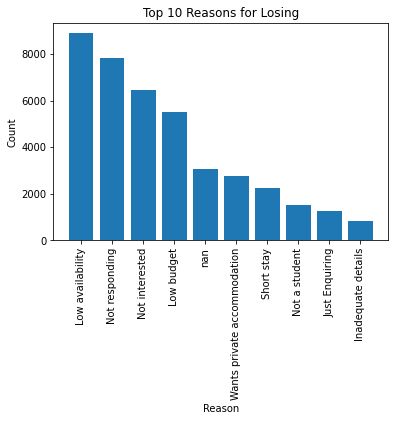

In [15]:
import matplotlib.pyplot as plt

# select only the top 10 reasons
top_10_reasons = df['lost_reason'].astype(str).value_counts().head(10)

# create a bar chart using only the top 10 reasons
plt.bar(top_10_reasons.index, top_10_reasons.values)

# set the title and axis labels
plt.title('Top 10 Reasons for Losing')
plt.xlabel('Reason')
plt.ylabel('Count')

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# display the plot
plt.show()

In [16]:
one_ = pd.get_dummies(df['lost_reason'])

In [17]:
df = pd.concat([df, one_], axis=1)

In [18]:
df.drop('lost_reason',axis=1, inplace=True)

In [19]:
df['budget'].value_counts()

£60 - £120 Per week     9750
£121 - £180 Per Week    8878
0-0                     5719
£181 - £240 Per Week    2143
100                     1509
                        ... 
0-80-100$                  1
0-235                      1
£120-160 Per Week          1
1400 per month             1
0-500 PCM                  1
Name: budget, Length: 1851, dtype: int64

In [20]:
import re

def convert_range_to_numeric(range_str):
    # Convert non-string object to string
    if not isinstance(range_str, str):
        range_str = str(range_str)
    
    # Extract the numeric values from the range string using regex
    matches = re.findall(r'\d+', range_str)
    
    # Convert the numeric strings to integers
    nums = [int(match) for match in matches]
    
    # Calculate the average of the numeric values if the list is not empty
    if len(nums) > 0:
        avg = sum(nums) / len(nums)
    else:
        avg = 0
    
    return avg

# Apply the function to the 'budget' column
df['budget'] = df['budget'].apply(convert_range_to_numeric)

In [21]:
df['budget'].value_counts()

90.000000       9909
0.000000        9597
150.500000      8879
210.500000      2144
100.000000      1666
                ... 
25000.000000       1
3.333333           1
371.000000         1
467.000000         1
78.333333          1
Name: budget, Length: 621, dtype: int64

In [22]:
df.drop('lease', axis=1, inplace=True)

In [23]:
df.head()

,Unnamed: 0,status,budget,movein,source,source_city,source_country,utm_source,utm_medium,des_city,...,Not interested,Not responding,Not serving in that region,Repeat lead,Semester stay,Short stay,Supply issue,Underage student,Visa/admission denied,Wants private accommodation
0,0,LOST,0.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,...,0,1,0,0,0,0,0,0,0,0
1,1,LOST,0.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,...,0,0,0,0,0,0,0,0,0,0
2,2,LOST,150.5,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,...,0,1,0,0,0,0,0,0,0,0
3,3,LOST,0.0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,...,0,0,0,0,0,0,0,0,0,0
4,4,LOST,0.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df['movein'].isnull().value_counts()

False    32707
True     13610
Name: movein, dtype: int64

In [25]:
df.drop('movein', axis=1, inplace=True)

In [26]:
df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan, inplace=True)

In [27]:
df['room_type'].dropna().value_counts()

Ensuite         12379
Studio           6316
Entire Place     4128
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

In [28]:
one_hot_encode = pd.get_dummies(df['room_type'])

In [29]:
df = pd.concat([df, one_hot_encode], axis=1)

In [30]:
df.drop('room_type', axis=1, inplace=True)

In [31]:
df.head()

,Unnamed: 0,status,budget,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,...,Short stay,Supply issue,Underage student,Visa/admission denied,Wants private accommodation,Ensuite,Entire Place,Non-Ensuite,Studio,Twin-Studio
0,0,LOST,0.0,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,...,0,0,0,0,0,0,0,0,0,0
1,1,LOST,0.0,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,...,0,0,0,0,0,0,0,0,0,0
2,2,LOST,150.5,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,...,0,0,0,0,0,1,0,0,0,0
3,3,LOST,0.0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,...,0,0,0,0,0,0,0,0,0,0
4,4,LOST,0.0,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.drop(['source', 'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city', 'des_country', 'lead_id'], axis=1, inplace=True)

In [33]:
df.head()

,Unnamed: 0,status,budget,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450,96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489,Other,eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b,fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5,Booked on campus accommodation,...,Short stay,Supply issue,Underage student,Visa/admission denied,Wants private accommodation,Ensuite,Entire Place,Non-Ensuite,Studio,Twin-Studio
0,0,LOST,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,LOST,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,LOST,150.5,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,LOST,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,LOST,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
X = df.drop(['status'], axis=1)

In [35]:
# rescale X
mean = np.mean(X)
std = np.std(X)
X = (X - mean) / std

C:\python37\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [36]:
from sklearn.preprocessing import LabelEncoder
y = df['status']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [37]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(37053, 43)
(9264, 43)


In [39]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = rfc.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        LOST       1.00      1.00      1.00      8682
         WON       0.99      1.00      1.00       582

    accuracy                           1.00      9264
   macro avg       1.00      1.00      1.00      9264
weighted avg       1.00      1.00      1.00      9264



In [44]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9996761658031088
